## **En primer lugar importamos las librerías que vamos a necesitar.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
# import yfinance as yf
import investpy
from matplotlib.figure import Figure
import plotly.graph_objects as go
from scipy.optimize import minimize

## **En el segundo paso importamos desde yahoo finance la data de los activos que seleccionemos.**

In [2]:
# Next we will get the stock tickers and the price data.

# Define the stock tickers
stock_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'META', 'JPM', 'V', 'NVDA', 'NFLX']

file_path = r"C:\Users\Juan Carlos\Dropbox\Clases\EAFIT\Inversiones\Archivos Excel\Precios Históricos Acciones USA.xlsx"

sheet_name = 'Precios'

# Define the date range
start_date = "2015-01-01"
end_date = "2024-12-31"

# Download historical adjusted closing prices for all tickers at once
price_data = pd.read_excel(file_path, sheet_name = sheet_name)

# Ensure the first column is parsed as dates correctly
price_data.iloc[:, 0] = pd.to_datetime(price_data.iloc[:, 0])

# Set the date column as index for easier filtering (optional but recommended)
price_data.set_index(price_data.columns[0], inplace=True)

price_data = price_data.loc[start_date:end_date]

# Download historical adjusted closing prices for S&P 500
ticker_SP500 = '^GSPC'
SP500_data = pd.read_excel(file_path, sheet_name = 'SP500')

# Ensure the first column is parsed as dates correctly
SP500_data.iloc[:, 0] = pd.to_datetime(SP500_data.iloc[:, 0])

# Set the date column as index for easier filtering (optional but recommended)
SP500_data.set_index(SP500_data.columns[0], inplace=True)

SP500_data = SP500_data.loc[start_date:end_date]

# Display results
print("Stock Prices Data:")
print(price_data.head())
print("\nS&P 500 Data:")
print(SP500_data.head())

Stock Prices Data:
            APPLE   MSFT  GOOGL   AMZN   TSLA   META    JPM   VISA  NVDA  \
Date                                                                       
2015-01-02  27.33  46.76  26.48  15.43  14.62  78.45  62.49  66.25  0.50   
2015-01-05  26.56  46.33  25.97  15.11  14.01  77.19  60.55  64.79  0.49   
2015-01-06  26.57  45.65  25.33  14.76  14.09  76.15  58.98  64.38  0.48   
2015-01-07  26.94  46.23  25.26  14.92  14.06  76.15  59.07  65.24  0.48   
2015-01-08  27.97  47.59  25.35  15.02  14.04  78.17  60.39  66.11  0.50   

             NTFX  
Date               
2015-01-02  49.85  
2015-01-05  47.31  
2015-01-06  46.50  
2015-01-07  46.74  
2015-01-08  47.78  

S&P 500 Data:
             Price
Date              
2015-01-02  206.45
2015-01-05  202.82
2015-01-06  200.99
2015-01-07  203.48
2015-01-08  207.12


## **En el tercer paso calculamos los retornos de cada uno de los activos, partiendo de la serie de precios que bajamos.**

In [3]:
daily_returns = price_data.pct_change(1)

daily_returns.dropna(inplace=True)

returns_SP500 = SP500_data.pct_change(1)

returns_SP500.dropna(inplace=True)

print(daily_returns.head())
print()
print(returns_SP500.head())

               APPLE      MSFT     GOOGL      AMZN      TSLA      META  \
Date                                                                     
2015-01-05 -0.028174 -0.009196 -0.019260 -0.020739 -0.041724 -0.016061   
2015-01-06  0.000377 -0.014677 -0.024644 -0.023163  0.005710 -0.013473   
2015-01-07  0.013925  0.012705 -0.002764  0.010840 -0.002129  0.000000   
2015-01-08  0.038233  0.029418  0.003563  0.006702 -0.001422  0.026527   
2015-01-09  0.001073 -0.008405 -0.012229 -0.011318 -0.018519 -0.005501   

                 JPM      VISA      NVDA      NTFX  
Date                                                
2015-01-05 -0.031045 -0.022038 -0.020000 -0.050953  
2015-01-06 -0.025929 -0.006328 -0.020408 -0.017121  
2015-01-07  0.001526  0.013358  0.000000  0.005161  
2015-01-08  0.022346  0.013335  0.041667  0.022251  
2015-01-09 -0.017387 -0.014824  0.000000 -0.015488  

               Price
Date                
2015-01-05 -0.017583
2015-01-06 -0.009023
2015-01-07  0.012389
2015

## **En el cuarto paso calculamos el retorno promedio de los activos, así como su desviación estándar.**

In [4]:
# Calculamos el promedio de los retornos diarios de los activos
mean_daily_returns = daily_returns.mean()

# Anualizamos esos retornos diarios multiplicando por el número de días bancarios en un año (252).
mean_annual_returns = mean_daily_returns * 252


print('Retornos anuales')
print(mean_annual_returns)

print()

assets_std = (np.std(daily_returns)*np.sqrt(252))
print('Desviación estándar anual')
print(assets_std)

print()



Retornos anuales
APPLE    0.488143
MSFT     0.257156
GOOGL    2.045855
AMZN     0.319433
TSLA     0.495181
META     0.272439
JPM      0.172127
VISA     0.186319
NVDA     4.496102
NTFX     0.385425
dtype: float64

Desviación estándar anual
APPLE     1.019296
MSFT      0.271466
GOOGL     6.024415
AMZN      0.327669
TSLA      0.571399
META      0.374763
JPM       0.273996
VISA      0.244193
NVDA     12.377035
NTFX      0.436143
dtype: float64



C:\Users\Juan Carlos\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


## **En este quinto paso calculamos el Ratio de Sharpe de cada uno de los activos con los que estamos trabajando, así como el del S&P500.**

In [5]:
risk_free_rate = 0.04

sharpe_ratios_assets = (mean_annual_returns - risk_free_rate) / assets_std

print('Sharpe Ratios')
print(sharpe_ratios_assets)

print()

sharpe_ratio_SP500 = (np.mean(returns_SP500)*252 - risk_free_rate) / (np.std(returns_SP500)*np.sqrt(252))
print('S&P 500 Sharpe Ratio')
print(sharpe_ratio_SP500)

Sharpe Ratios
APPLE    0.439659
MSFT     0.799940
GOOGL    0.332954
AMZN     0.852790
TSLA     0.796608
META     0.620229
JPM      0.482221
VISA     0.599191
NVDA     0.360030
NTFX     0.791999
dtype: float64

S&P 500 Sharpe Ratio
Price    0.448024
dtype: float64


## **En el sexto paso convertimos los precios de los activos a Base 100, con el fin de poderlos apreciar mejor en una gráfica.**

In [6]:
# create price series
# Create a DataFrame with prices starting at 100 for each asset
prices_base100 = (1 + daily_returns).cumprod() * 100
print(prices_base100.head())

print()

SP500_base100 = (1 + returns_SP500).cumprod() * 100
print('S&P 500 Base 100')
print(SP500_base100.head())

                 APPLE        MSFT      GOOGL       AMZN       TSLA  \
Date                                                                  
2015-01-05   97.182583   99.080411  98.074018  97.926118  95.827633   
2015-01-06   97.219173   97.626176  95.657100  95.657809  96.374829   
2015-01-07   98.572997   98.866553  95.392749  96.694750  96.169631   
2015-01-08  102.341749  101.775021  95.732628  97.342839  96.032832   
2015-01-09  102.451518  100.919589  94.561934  96.241089  94.254446   

                 META        JPM       VISA   NVDA       NTFX  
Date                                                           
2015-01-05  98.393881  96.895503  97.796226   98.0  94.904714  
2015-01-06  97.068196  94.383101  97.177358   96.0  93.279840  
2015-01-07  97.068196  94.527124  98.475472   96.0  93.761284  
2015-01-08  99.643085  96.639462  99.788679  100.0  95.847543  
2015-01-09  99.094965  94.959193  98.309434  100.0  94.363089  

S&P 500 Base 100
                 Price
Date         

## **En esta parte vamos a graficar los precios de los activos en base 100, así como el SP500, también en base 100.**

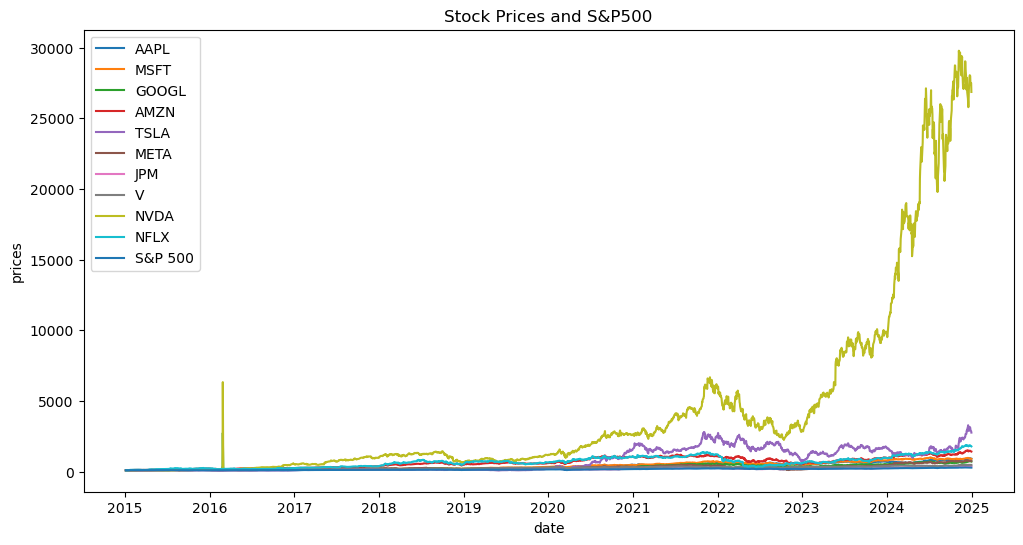

In [7]:
# Incrementamos el tamaño de la gráfica para mejor visualización
plt.figure(figsize=(12, 6))

# graficamos los puntos
plt.plot(prices_base100, label=(stock_tickers))
plt.plot(SP500_base100, label='S&P 500')

# le damos nombre al eje "x".
plt.xlabel('date')
# le damos nombre al eje "y"
plt.ylabel('prices')

# titulamos la gráfica
plt.title('Stock Prices and S&P500')

# agregamos leyendas de acuerdo a los nombres de las columnas en la base de datos
plt.legend()


# función para mostrar la gráfica
plt.show()

## **Ahora Calcularemos tanto la Matriz de Correlaciones como la Matriz de Varianza-Covarianza**

In [8]:
mat_correlaciones = daily_returns.corr()
print('***************************Correlation Matrix*****************************')
print(mat_correlaciones)

print()
print('***************Matrix Variance-Covariance (Annual)****************')
mat_var_covar = daily_returns.cov()*252
print(mat_var_covar)


***************************Correlation Matrix*****************************
          APPLE      MSFT     GOOGL      AMZN      TSLA      META       JPM  \
APPLE  1.000000  0.192611  0.948826  0.154639  0.115020  0.148537  0.121217   
MSFT   0.192611  1.000000  0.033694  0.658011  0.399549  0.583089  0.440562   
GOOGL  0.948826  0.033694  1.000000  0.029486  0.015939  0.029465  0.019566   
AMZN   0.154639  0.658011  0.029486  1.000000  0.387733  0.591144  0.293700   
TSLA   0.115020  0.399549  0.015939  0.387733  1.000000  0.320301  0.263444   
META   0.148537  0.583089  0.029465  0.591144  0.320301  1.000000  0.311042   
JPM    0.121217  0.440562  0.019566  0.293700  0.263444  0.311042  1.000000   
VISA   0.158404  0.631258  0.025937  0.460615  0.343212  0.456017  0.581941   
NVDA   0.942156  0.023343  0.998774  0.018941  0.014623  0.018385  0.012996   
NTFX   0.120597  0.463303  0.022263  0.513705  0.333319  0.453373  0.230093   

           VISA      NVDA      NTFX  
APPLE  0.158404  

## **Ahora vamos a calcular el retorno y varianza de un portafolio de pesos iguales (Equally Weighted)**

In [9]:
num_assets = len(stock_tickers)
w_equal = np.ones(num_assets) / num_assets
print(w_equal)

print()

print('Return of an Equally Weighted Portfolio')
return_equally_weighted = np.dot(w_equal, mean_annual_returns)
print(f"{return_equally_weighted:.2%}")

print()

print('Variance of an Equally Weighted Portfolio')
variance_equally_weighted = np.dot(np.dot(w_equal, mat_var_covar), w_equal.T)
print(f"{variance_equally_weighted:.2%}")

print()

print('Sharpe Ratio of an Equally Weighted Portfolio')
SR_equally_weighted = (return_equally_weighted - risk_free_rate) / np.sqrt(variance_equally_weighted)
print(f"{SR_equally_weighted:.2}")

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]

Return of an Equally Weighted Portfolio
91.18%

Variance of an Equally Weighted Portfolio
380.69%

Sharpe Ratio of an Equally Weighted Portfolio
0.45


## **A continuación simulamos muchos vectores W y para cada uno, calculamos el retorno del portafolio de riesgo, su desviación estándar y el Ratio de Sharpe**

In [10]:
num_simulations = 10000
results = np.zeros((num_simulations, 3))  # return, stddev, sharpe
all_weights = np.zeros((num_simulations, num_assets))

np.random.seed(42)
for i in range(num_simulations):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)  # normalization

    # Metrics
    portfolio_return = np.sum(weights * mean_annual_returns)
    portfolio_stddev = np.sqrt(weights.T @ mat_var_covar @ weights)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_stddev

    # Store
    all_weights[i] = weights
    results[i] = [portfolio_return, portfolio_stddev, sharpe_ratio]


## **Seguidamente vamos a seleccionar el portafolio que tenga el máximo Ratio de Sharpe y ese será el portafolio óptimo**

In [11]:
# Find the optimal portfolio (highest Sharpe ratio)
max_sharpe_idx = np.argmax(results[:, 2])  # Correct: explicitly from results[:, 2]
optimal_weights = all_weights[max_sharpe_idx]
optimal_return = results[max_sharpe_idx, 0]
optimal_stddev = results[max_sharpe_idx, 1]
optimal_sharpe_ratio = results[max_sharpe_idx, 2]

# Now print clearly the optimal results:
print("Optimal Portfolio (Max Sharpe Ratio):")
print(f"Expected Return: {optimal_return:.2%}")
print(f"Standard Deviation: {optimal_stddev:.2%}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")
print(f"Weights: {optimal_weights.round(4)}")

Optimal Portfolio (Max Sharpe Ratio):
Expected Return: 36.86%
Standard Deviation: 30.42%
Sharpe Ratio: 1.0802
Weights: [0.024  0.1119 0.0066 0.1014 0.2222 0.1142 0.1345 0.0386 0.0038 0.2427]


## **Ahora vamos a graficar todos los portafolios simulados**

C:\Users\Juan Carlos\AppData\Local\Temp\ipykernel_51588\2571890051.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(np.sqrt(mat_var_covar.iloc[i, i]), mean_annual_returns[i], marker='o', s=100, label=stock)
C:\Users\Juan Carlos\AppData\Local\Temp\ipykernel_51588\2571890051.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(np.sqrt(mat_var_covar.iloc[i, i]), mean_annual_returns[i], stock, fontsize=9, verticalalignment='bottom')


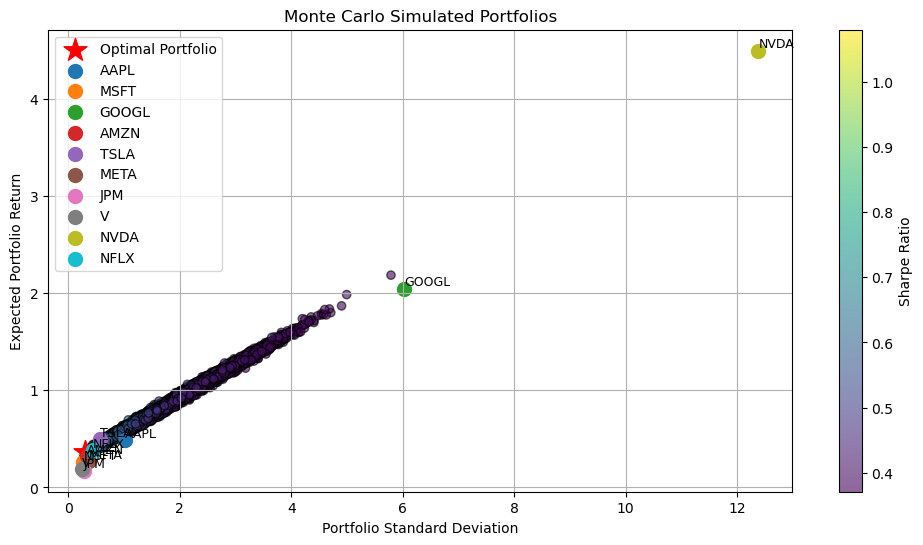

In [12]:
# Plot Efficient Frontier
plt.figure(figsize=(12, 6))

# Scatter plot of simulated portfolios
plt.scatter(results[:, 1], results[:, 0], c=results[:, 2], cmap='viridis', alpha=0.6, edgecolors='k')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Expected Portfolio Return')
plt.title('Monte Carlo Simulated Portfolios')

# Highlight Optimal Portfolio
plt.scatter(optimal_stddev, optimal_return, color='red', marker='*', s=300, label='Optimal Portfolio')

# Individual stocks plotted separately
for i, stock in enumerate(stock_tickers):
    plt.scatter(np.sqrt(mat_var_covar.iloc[i, i]), mean_annual_returns[i], marker='o', s=100, label=stock)
    plt.text(np.sqrt(mat_var_covar.iloc[i, i]), mean_annual_returns[i], stock, fontsize=9, verticalalignment='bottom')

plt.legend()
plt.grid(True)
plt.show()


Optimal Portfolio Expected Return: 0.3686
Optimal Portfolio Standard Deviation: 0.3042
Optimal Portfolio Weights:
AAPL: 0.0240
MSFT: 0.1119
GOOGL: 0.0066
AMZN: 0.1014
TSLA: 0.2222
META: 0.1142
JPM: 0.1345
V: 0.0386
NVDA: 0.0038
NFLX: 0.2427


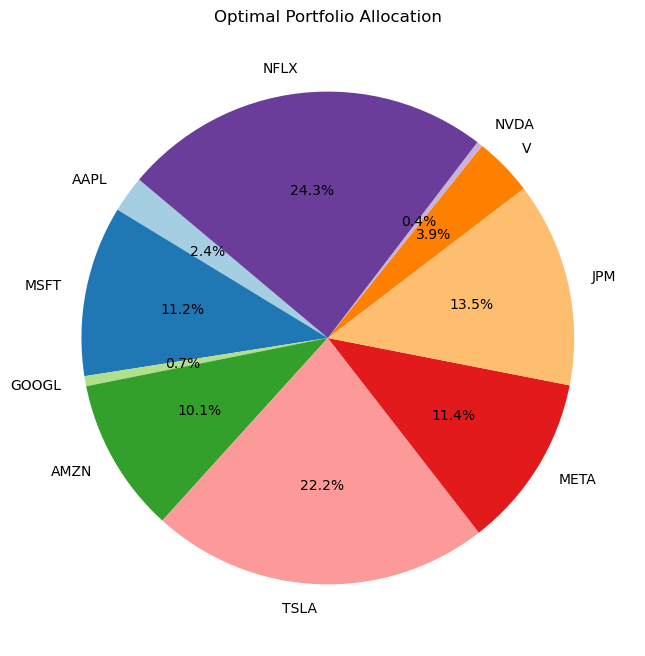

In [13]:
# Print Optimal Portfolio Metrics
print(f"Optimal Portfolio Expected Return: {optimal_return:.4f}")
print(f"Optimal Portfolio Standard Deviation: {optimal_stddev:.4f}")
print("Optimal Portfolio Weights:")
for stock, weight in zip(stock_tickers, optimal_weights):
    print(f"{stock}: {weight:.4f}")

# Pie Chart for Optimal Portfolio Allocation
plt.figure(figsize=(8, 8))
plt.pie(optimal_weights, labels=stock_tickers, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Optimal Portfolio Allocation")
plt.show()
